Sourced from kaggle
## Dataset Description
In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For the ith sample, Squared Logarithmic Error is calculated as SLE = (log(prediction + 1) - log(actual + 1))^2. RMSLE is then sqrt(mean(squared logarithmic errors)).

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p C:\Users\HP
!touch C:\Users\HP\.kaggle/kaggle.json
!chmod 600 C:\Users\HP\.kaggle\kaggle.json

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file C:\Users\HP already exists.
Error occurred while processing: C:\Users\HP.


In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "your-user-name"
kaggle_key = "your-key"

# Save API token the kaggle.json file
with open("C:/Users/HP/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [4]:
# Download the time series dataset
# !kaggle competitions download -c store-sales-time-series-forecasting

In [5]:
# Unzip the files
!unzip -o store-sales-time-series-forecasting.zip # Will not work

Archive:  store-sales-time-series-forecasting.zip


caution: filename not matched:  #
caution: filename not matched:  Will
caution: filename not matched:  not
caution: filename not matched:  work


In [6]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = '../data/store-sales-time-series-forecasting.zip'

# Specify the directory where you want to extract the contents
extracted_dir = './'

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

In [7]:
train_csv = pd.read_csv('../data/train.csv')
test_csv = pd.read_csv('../data/test.csv')
transactions_csv = pd.read_csv('../data/transactions.csv')
holidays_csv = pd.read_csv('../data/holidays_events.csv')

In [8]:
holidays_csv.drop(["description","locale_name","locale_name"], axis=1, inplace=True)

In [9]:
holidays_csv.drop_duplicates(inplace=True)

In [10]:
holidays_type_csv = holidays_csv.groupby(["date"], as_index=False)["type"].first()
holidays_locale_csv = holidays_csv.groupby(["date"], as_index=False)["locale"].first()

In [11]:
train_csv.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [12]:
train_csv['sales'].sum()

1073644952.2030689

In [13]:
train_csv = train_csv.merge(holidays_type_csv, how='left', on='date')
test_csv = test_csv.merge(holidays_type_csv, how='left', on='date')

train_csv = train_csv.merge(holidays_locale_csv, how='left', on='date')
test_csv = test_csv.merge(holidays_locale_csv, how='left', on='date')

In [14]:
test_csv

,id,date,store_nbr,family,onpromotion,type,locale
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,NaN,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,NaN,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,NaN,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,NaN,NaN


In [15]:
def fix_missing_values(data):
    # Fill the numeric missing values with median
    numeric_cols = data.select_dtypes(include=["int", "float"]).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

    # Fill the string missing values with mode
    string_cols = data.select_dtypes(include=["object"]).columns
    for col in string_cols:  # Get the first mode from the Series
        data[col] = data[col].fillna("Not Applicable")

    return data

train_csv = fix_missing_values(train_csv)
test_csv = fix_missing_values(test_csv)

## Analyze the general Sales data without other predictors

In [16]:
sales = train_csv[["date", "sales"]]
sales = sales.groupby("date", as_index=False)["sales"].sum()
sales["date"] = pd.to_datetime(sales['date'])

In [17]:
sales["sales"].sum()

1073644952.2030686

In [18]:
import os
os.chdir('./TimeSeriesclass/')

In [19]:
from basicTimeSeries import SARIMAModels
ts = SARIMAModels()

In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1684 non-null   datetime64[ns]
 1   sales   1684 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.4 KB


In [21]:
sales.set_index('date', inplace=True)

In [22]:
# Resample the data to daily frequency and fill missing values
sales = sales.resample('D').asfreq()

In [23]:
sales = sales.fillna(method='ffill')

In [24]:
sales.isna().sum()

sales    0
dtype: int64

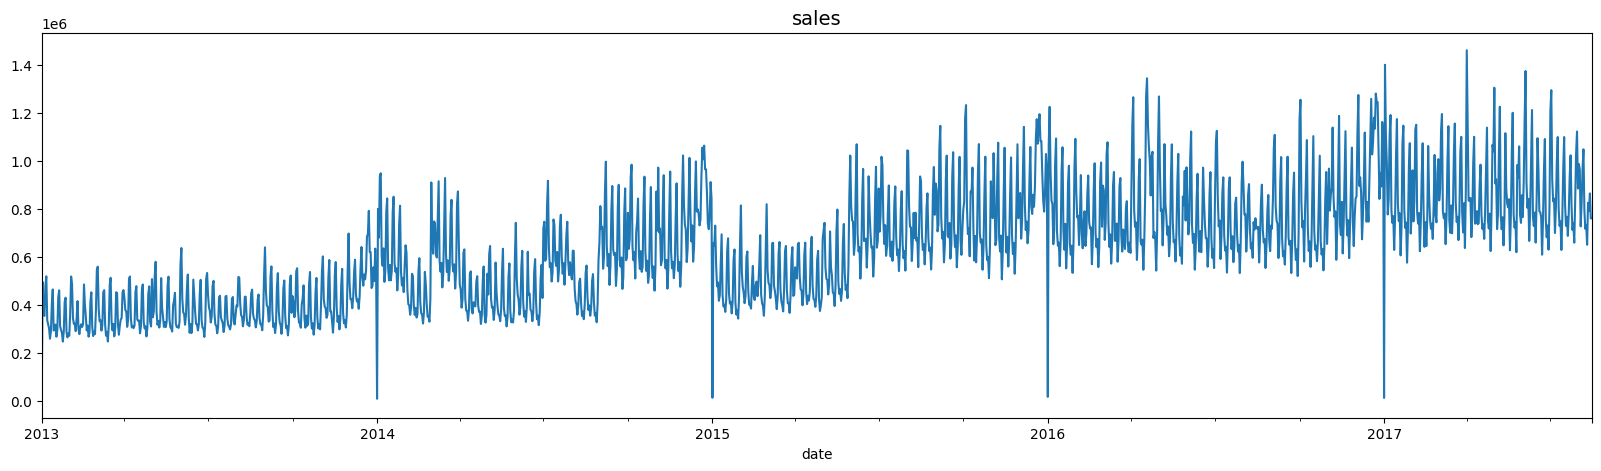

In [25]:
ts.trend_visualizations(sales)

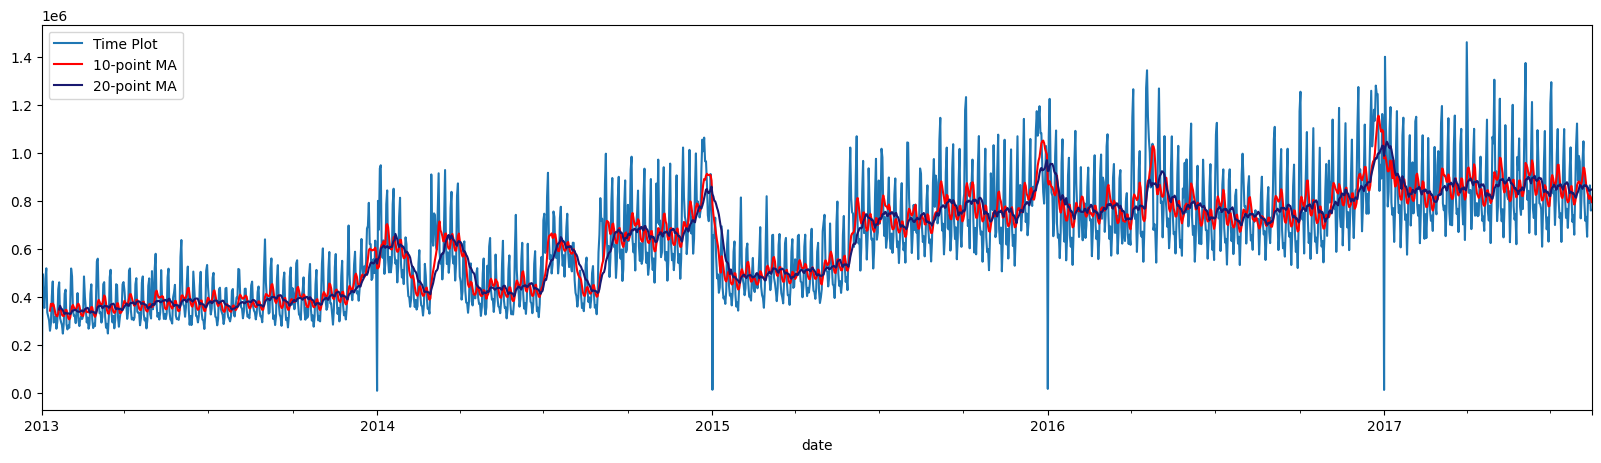

In [26]:
fig, ax = plt.subplots()
sales.plot(ax=ax)
sales.rolling(10).mean().plot(ax=ax, c='red') # 10-point rolling mean
sales.rolling(20).mean().plot(ax=ax, c='midnightblue') # 20-point rlling mean
plt.legend(["Time Plot", "10-point MA", "20-point MA"])
plt.show()

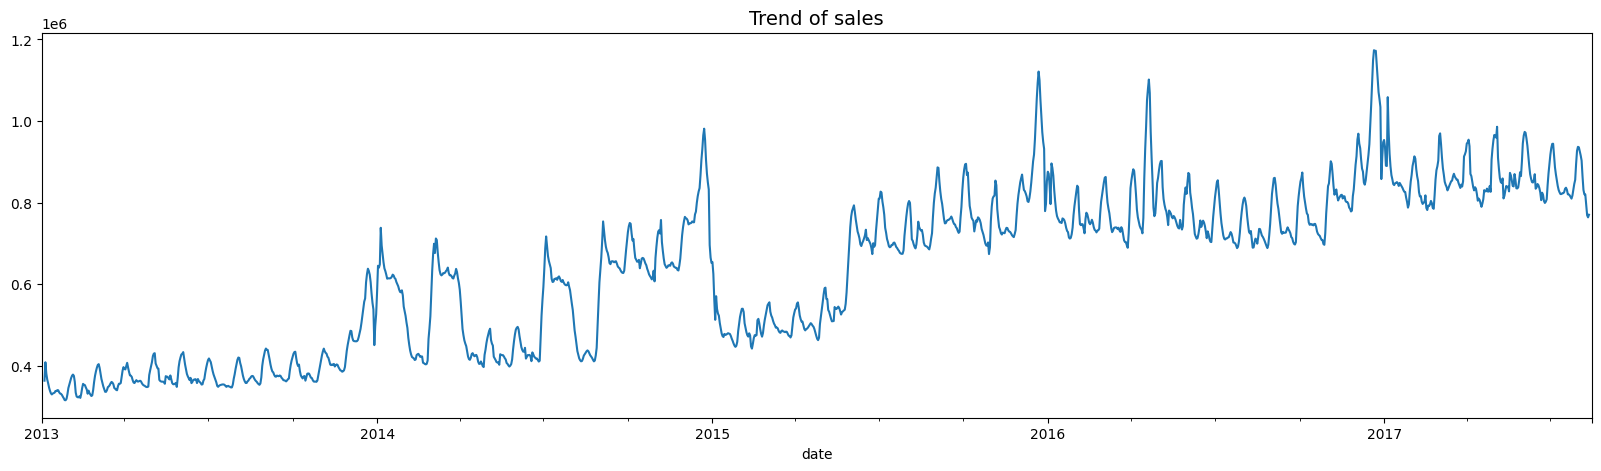

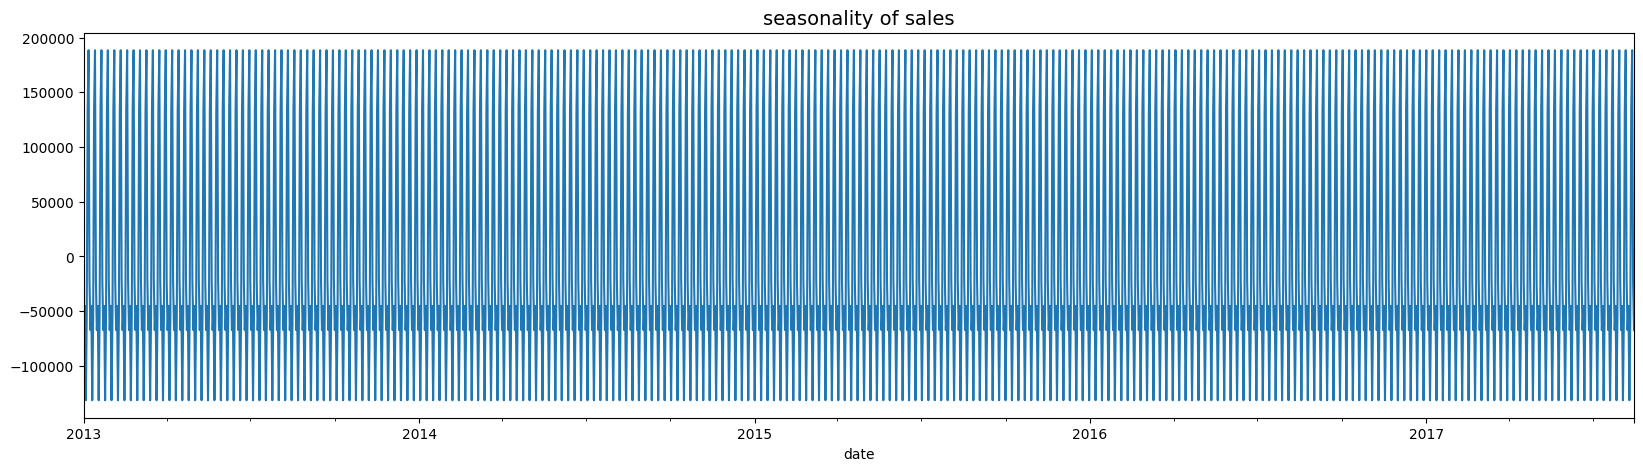

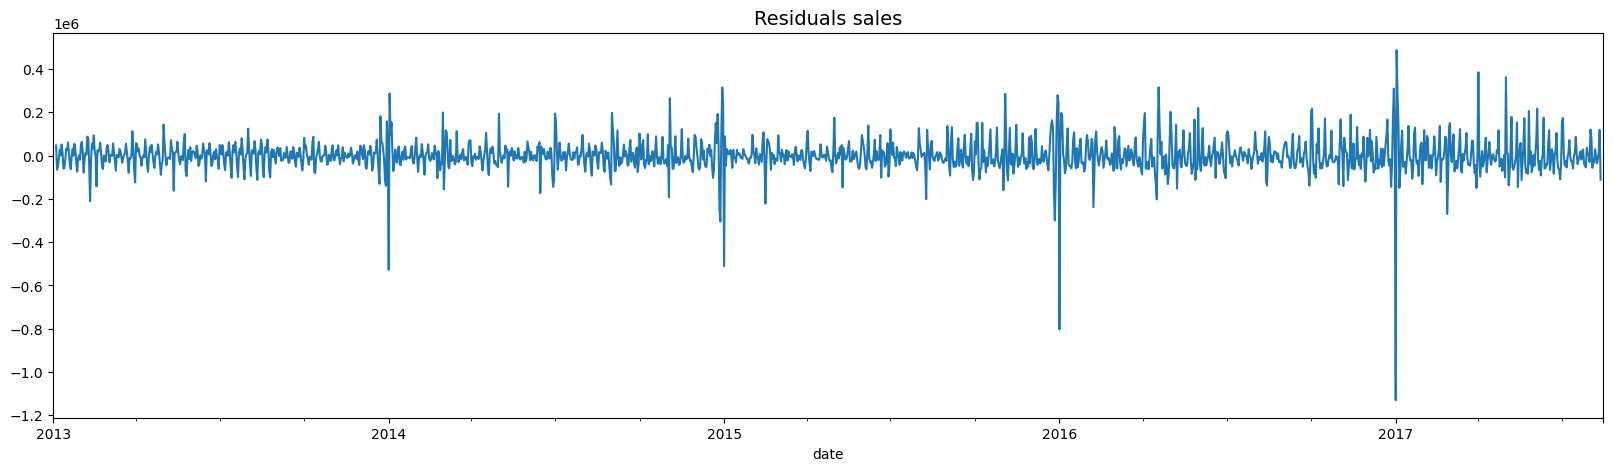

In [27]:
ts.decomposition_plot(sales)

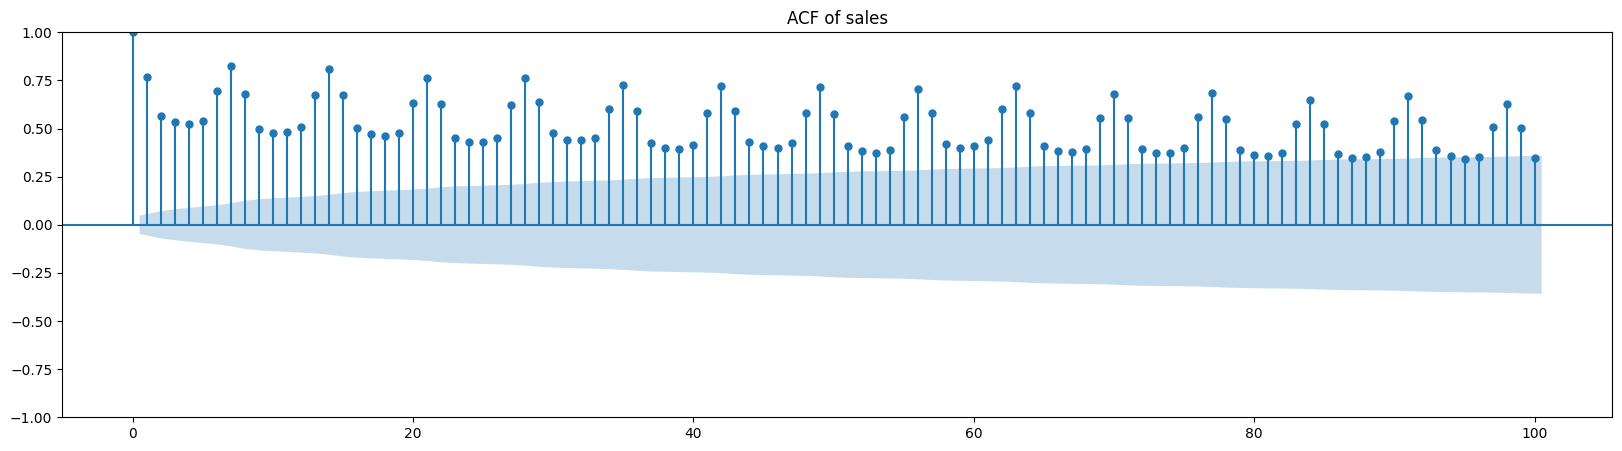

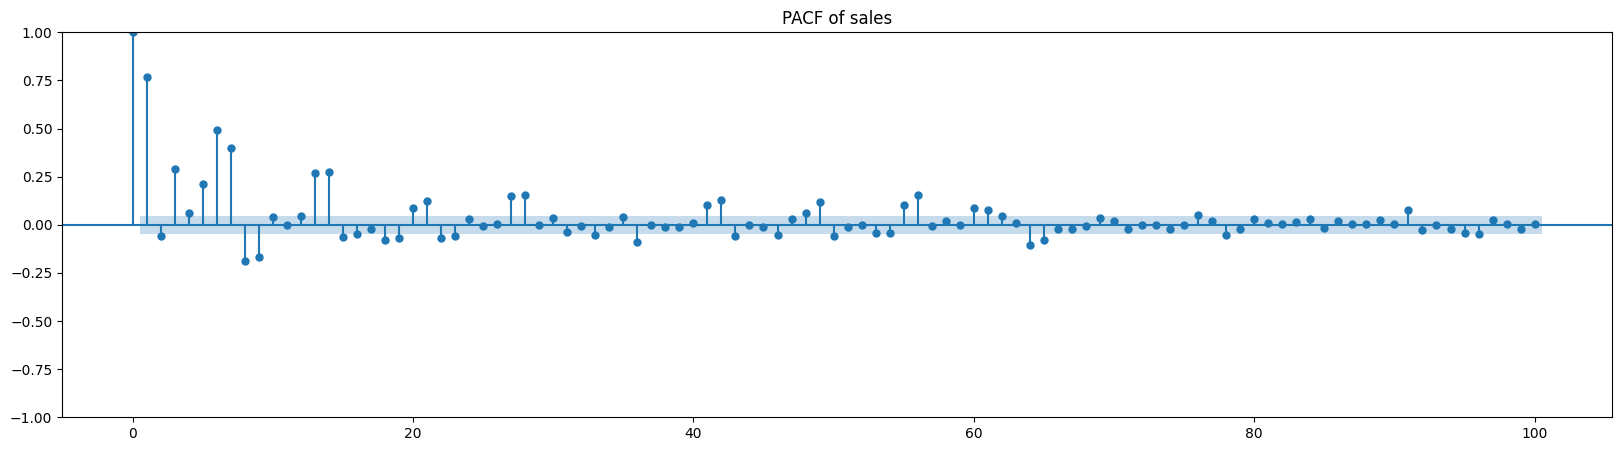

In [28]:
ts.correlation_function(sales, lags=100)

In [29]:
ts.stationarity_check(sales)

    Augmented Dickey-Fuller Test on "sales" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6233
 No. Lags Chosen       = 22
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0883. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [30]:
train, test = ts.split_data(sales, ratio=0.8)

In [31]:
# ts.model_evaluation(train_data=train, order_limit=2)

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                 1350
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -17435.659
Date:                            Sun, 22 Oct 2023   AIC                          34885.319
Time:                                    15:23:12   BIC                          34921.569
Sample:                                01-01-2013   HQIC                         34898.914
                                     - 09-11-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4990      0.069      7.259      0.000       0.364       0.634
ar.L2         -0.2925      0.075   

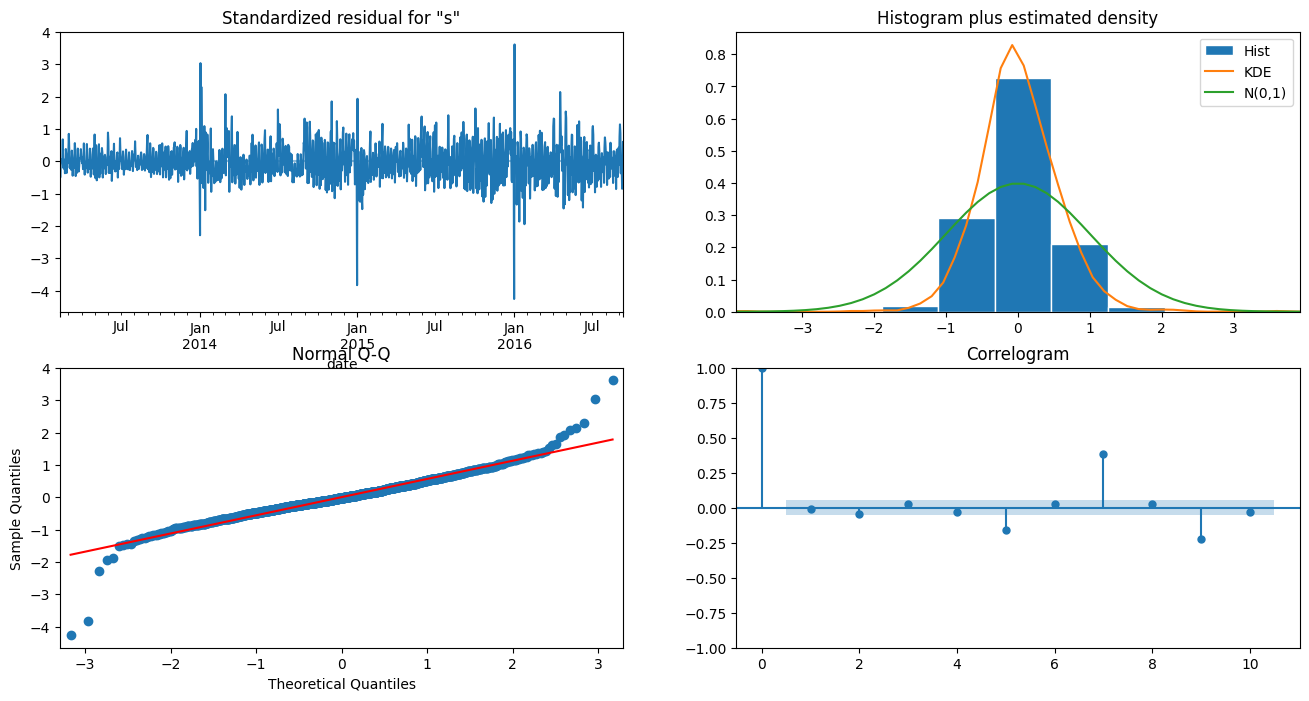



----------------------------------------------- 
 ----------------------------------------------- 

Ljung-Box Test - Checks for Serial Correlation 

null-hypothesis:         The residuals are independently distributed.
alternative-hypothesis:  The residuals are not independently distributed 
 -----------------------------------------------
    lb_stat  lb_pvalue
1  0.111833   0.738067


----------------------------------------------- 
 ----------------------------------------------- 

How predictions compares to actual test data 



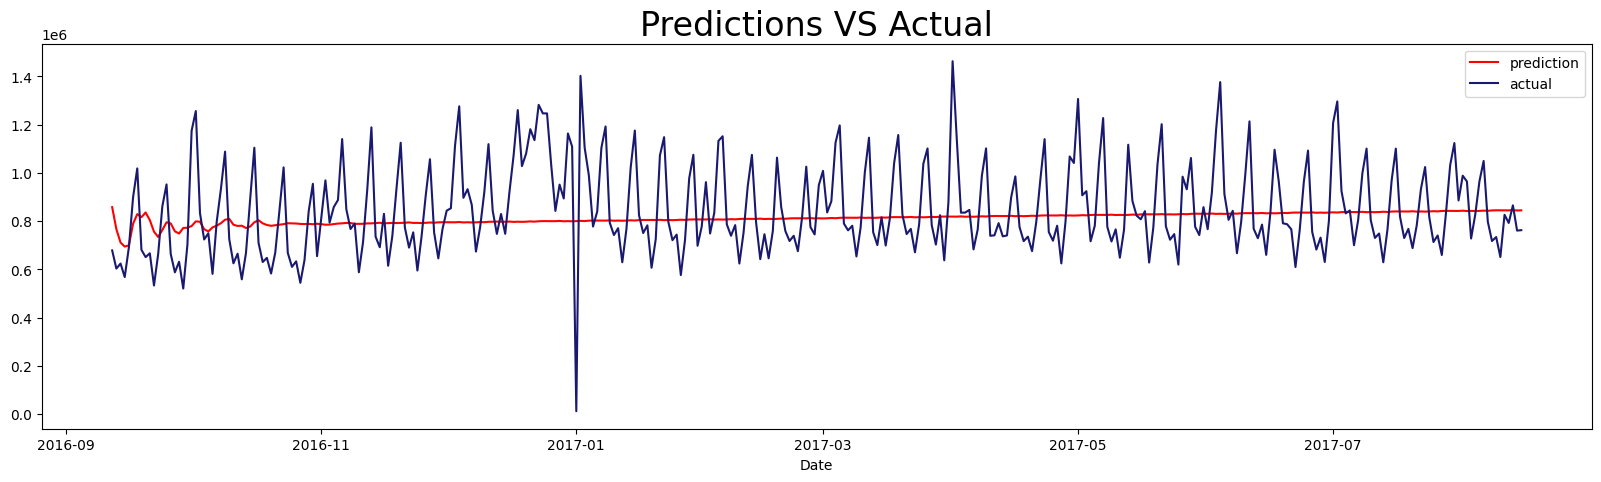

In [32]:
residuals = ts.best_model(train, test, order=(2, 1, 1),
                         seasonal_order=(2, 1, 1, 12), lags=1)

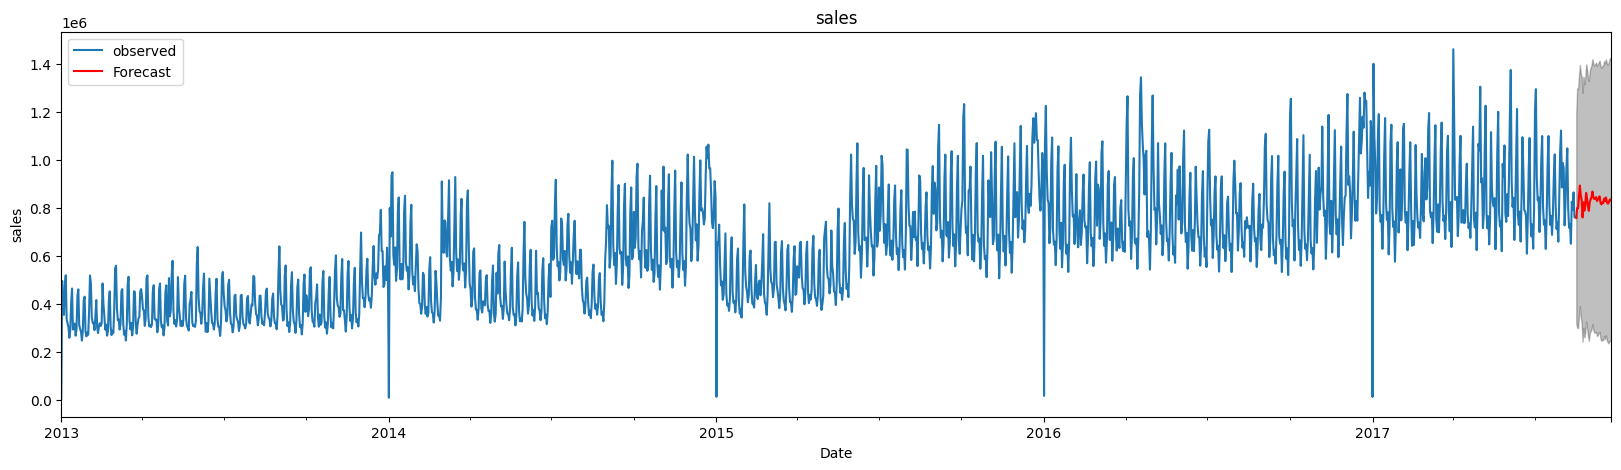

In [33]:
predictions = ts.forecasts(sales["sales"],
                                      order=(2, 1, 1),seasonal_order=(2, 1, 1, 12),
                                      steps=40)

In [34]:
train_csv["date"] = pd.to_datetime(train_csv["date"])
train_csv.set_index("date", inplace=True)

test_csv["date"] = pd.to_datetime(test_csv["date"])
test_csv.set_index("date", inplace=True)

<AxesSubplot:>

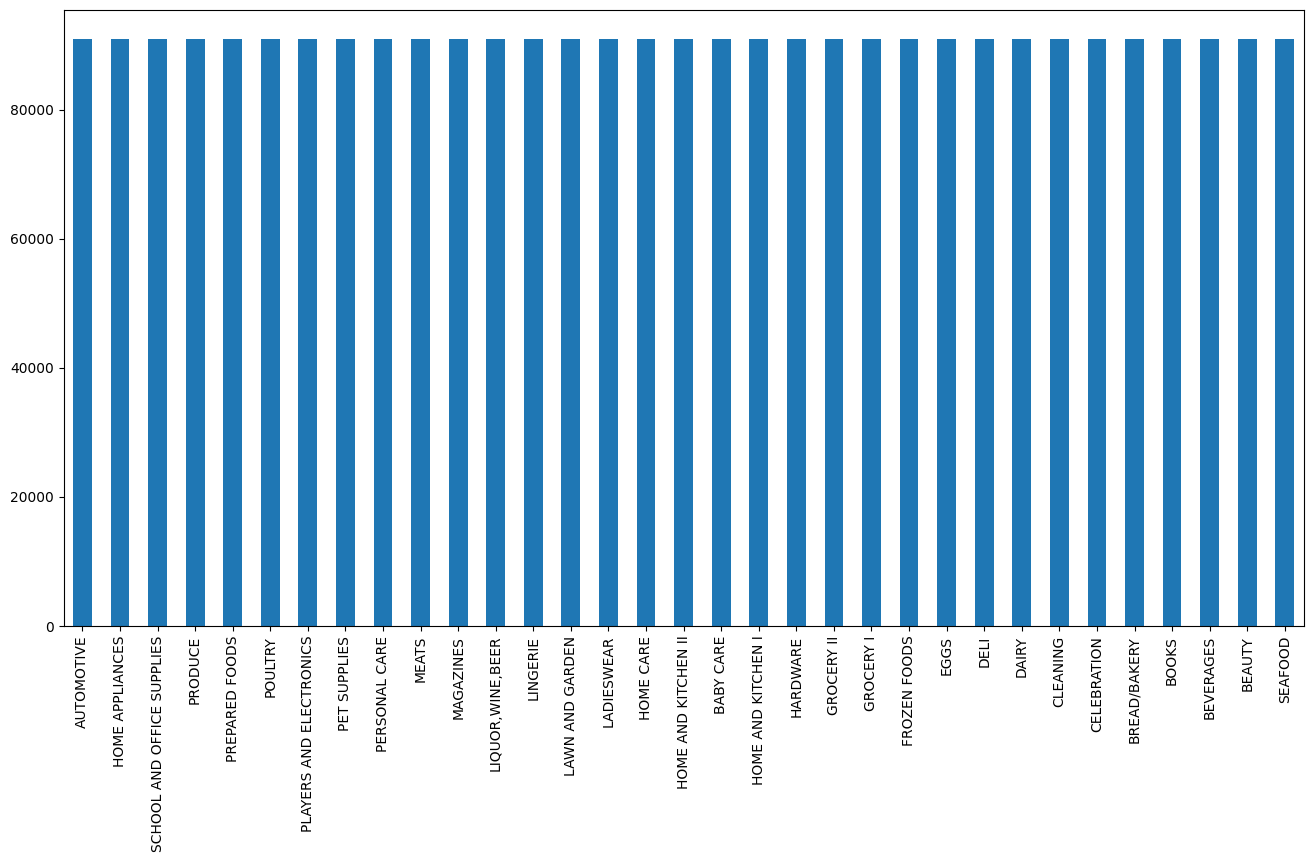

In [35]:
train_csv["family"].value_counts().plot(kind='bar', figsize=(16,8))

array([[<AxesSubplot:title={'center':'store_nbr'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'onpromotion'}>, <AxesSubplot:>]],
      dtype=object)

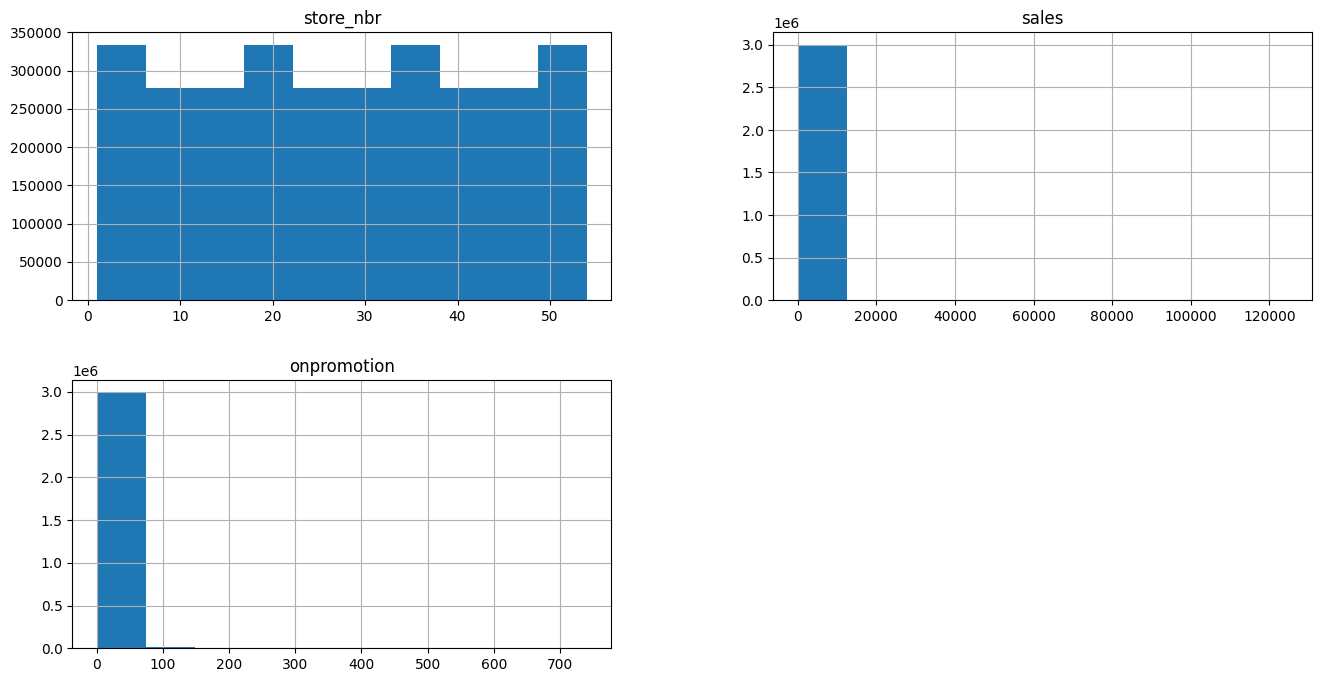

In [36]:
train_csv.iloc[:,1:].hist(figsize=(16,8))

In [37]:
# Create other variables
def create_date_vars(df=train_csv):
    df["year"] = df.index.year
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["day"] = df.index.day
    return df

In [38]:
train_csv = create_date_vars()
test_csv = create_date_vars(df=test_csv)
train_csv.shape, test_csv.shape

((3000888, 11), (28512, 10))

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y_train = train_csv.pop("sales")
X_train = train_csv.iloc[:,1:]

# y_test = test_csv.pop("sales")
X_test = test_csv.iloc[:,1:]
print(X_train.shape, X_test.shape)

(3000888, 9) (28512, 9)


In [40]:
# Generate dummy variables for the categorical columns
def generate_dummy(data=pd.concat([X_train, X_test])):
    for col in data.select_dtypes(include='object').columns.to_list():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
        data.drop(col, axis=1, inplace=True) 
    return data
X = generate_dummy()
X_train = X[X.index<'2017-08-16']
X_test = X[X.index>='2017-08-16']
X_train, X_val, y_train, y_val = X_train.iloc[:-500000],X_train.iloc[-500000:],y_train.iloc[:-500000],y_train.iloc[-500000:]

In [41]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape

((2500888, 50), (500000, 50), (28512, 50), (2500888,), (500000,))

In [42]:
from sklearn.preprocessing import StandardScaler

def preprocessor(X):
    # Standardise the whole dataset
    std_scaler = StandardScaler().fit(X_train)
    D = np.copy(X)
    D = std_scaler.transform(D)
    return D

In [43]:
from sklearn.preprocessing import FunctionTransformer
preprocessor_transformer = FunctionTransformer(preprocessor)
preprocessor_transformer

FunctionTransformer(func=<function preprocessor at 0x0000013C38E05558>)

In [44]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

p1 = Pipeline([('scaler', preprocessor_transformer),
              ('Linear Regression', XGBRegressor())])

p1

Pipeline(steps=[('scaler',
                 FunctionTransformer(func=<function preprocessor at 0x0000013C38E05558>)),
                ('Linear Regression',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=

In [45]:
from sklearn.metrics import mean_absolute_error

def fit_and_print(p, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val):
    # Fit the transformer
    p.fit(X_train, y_train)
    # Predict the train and test outputs
    training_prediction = p.predict(X_train)
    test_prediction =p.predict(X_test)
    
    # Print the errors
    print("Training Error:     "+str(mean_absolute_error(training_prediction, y_train)))
    print("Test Error:         "+str(mean_absolute_error(test_prediction, y_test)))

In [47]:
fit_and_print(p1)

Training Error:     113.11857703733529
Test Error:         149.9649103228452


In [48]:
y_pred = p1.predict(X_test)

In [49]:
y_pred = pd.DataFrame({
    "y_pred": y_pred
},
index=X_test.index)

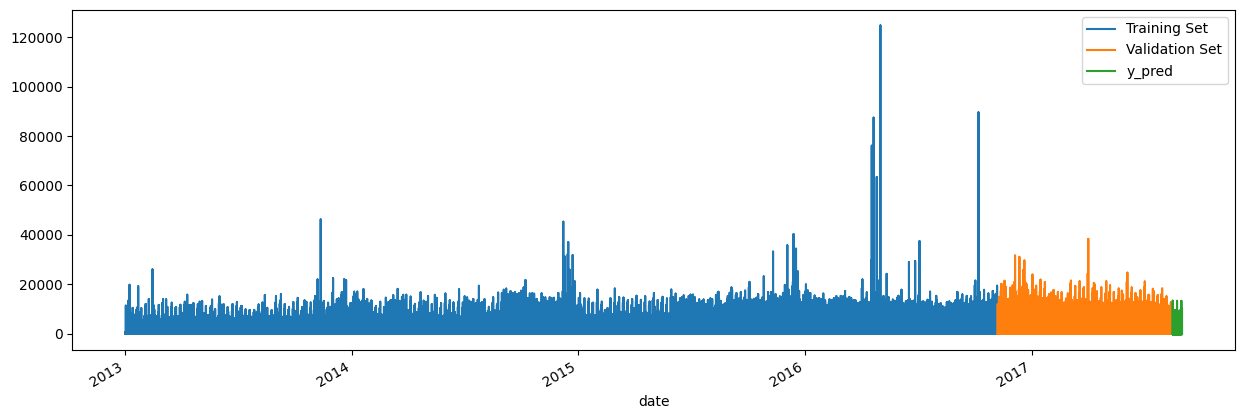

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))

y_train.plot(ax=ax, label="Training Set")
y_val.plot(ax=ax, label="Validation Set")
y_pred.plot(ax=ax, label="Prediction")
plt.legend()
plt.show()